In [ ]:
%%shell
jupyter nbconvert --to html /content/Bobrova_ML_Assignment_5.ipynb

[NbConvertApp] Converting notebook /content/Bobrova_ML_Assignment_5.ipynb to html
[NbConvertApp] Writing 765288 bytes to /content/Bobrova_ML_Assignment_5.html


In [ ]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plots
%matplotlib inline




In [ ]:
from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

def process_text(text):
    text = re.sub('[^a-zA-z .]', '', text.lower())
    return re.sub('[\[\]\_]', '', text)


In [ ]:
huck_finn_url = 'https://www.gutenberg.org/files/76/76-0.txt'
huck_finn_text_raw = read_url(huck_finn_url)
huck_finn_text = process_text(huck_finn_text_raw)

ct_yankee_url = 'https://www.gutenberg.org/files/86/86-0.txt'
ct_yankee_text_raw = read_url(ct_yankee_url)
ct_yankee_text = process_text(ct_yankee_text_raw)


In [ ]:
print("\nSample of raw text:\n")
print(huck_finn_text_raw[10000:11000])

print("\nSample of processed text:\n")
print(huck_finn_text[10000:11000])


Sample of raw text:

my old rags and my sugar-hogshead again, and was free and satisfied. But Tom Sawyer he hunted me up and said he was going to start a band of robbers, and I might join if I would go back to the widow and be respectable. So I went back. The widow she cried over me, and called me a poor lost lamb, and she called me a lot of other names, too, but she never meant no harm by it. She put me in them new clothes again, and I couldn't do nothing but sweat and sweat, and feel all cramped up. Well, then, the old thing commenced again. The widow rung a bell for supper, and you had to come to time. When you got to the table you couldn't go right to eating, but you had to wait for the widow to tuck down her head and grumble a little over the victuals, though there warn't really anything the matter with them,--that is, nothing only everything was cooked by itself. In a barrel of odds and ends it is different; things get mixed up, and the juice kind of swaps around, and the things

In [ ]:
pride_and_prejudice_url = 'https://www.gutenberg.org/files/1342/1342-0.txt'
pride_and_prejudice_text_raw = read_url(pride_and_prejudice_url)
pride_and_prejudice_text = process_text(pride_and_prejudice_text_raw)


emma_url = 'https://www.gutenberg.org/files/158/158-0.txt'
emma_text_raw = read_url(emma_url)
emma_text = process_text(emma_text_raw)

In [ ]:
print("\nSample of raw text:\n")
print(emma_text_raw[10000:11000])

print("\nSample of processed text:\n")
print(emma_text[10000:11000])


Sample of raw text:

all are.” Emma spared no exertions to maintain this happier flow of ideas, and hoped, by the help of backgammon, to get her father tolerably through the evening, and be attacked by no regrets but her own. The backgammon-table was placed; but a visitor immediately afterwards walked in and made it unnecessary. Mr. Knightley, a sensible man about seven or eight-and-thirty, was not only a very old and intimate friend of the family, but particularly connected with it, as the elder brother of Isabella’s husband. He lived about a mile from Highbury, was a frequent visitor, and always welcome, and at this time more welcome than usual, as coming directly from their mutual connexions in London. He had returned to a late dinner, after some days’ absence, and now walked up to Hartfield to say that all were well in Brunswick Square. It was a happy circumstance, and animated Mr. Woodhouse for some time. Mr. Knightley had a cheerful manner, which always did him good; and his man

In [ ]:
def ngrams(text, n=2):
    return Counter([text[(i-n):i] for i in np.arange(n, len(text)+1)])

class language_model:

    def __init__(self, text):
        self.one = ngrams(text, 1)
        self.two = ngrams(text, 2)
        self.three = ngrams(text, 3)
        self.four = ngrams(text, 4)
        self.weight = [0.1, 0.2, 0.3, 0.4]
        
    def set_weights(self, weights):
        self.weight = weights / np.sum(weights)
        
    def log_probability(self, gram):
        numer = [self.one[gram[3:]], self.two[gram[2:]], self.three[gram[1:]], self.four[gram[0:]]]
        denom = [sum(self.one[g] for g in self.one), self.one[gram[2:3]], self.two[gram[1:3]], self.three[gram[0:3]]]
        prob = 0
        for i in np.arange(4):
            prob += self.weight[i] * numer[i] / (denom[i]+1e-10)
        return np.log(prob)
    


$p(\mbox{z} \,|\, \mbox{qui})= 0.4\frac{\mbox{count}(quiz)}{\mbox{count}(qui)}  + 0.3 \frac{\mbox{count}(uiz)}{\mbox{count}(ui)}   + 0.2 \frac{\mbox{count}(iz)}{\mbox{count}(i)} + 0.1 \frac{\mbox{count}(z)}{N}$

(N is the number of characters in the text)

In [ ]:
emma_lm = language_model(emma_text)
huck_finn_lm = language_model(huck_finn_text)

In [ ]:
def compute_perplexity(text, lm):
    fours = ngrams(text, n = 4)
    prob = 0
    count = 0
    for i in fours:
        prob = prob + lm.log_probability(i)*fours[i]
        count = count + fours[i]
    prob = -1 * prob
    perplex = np.exp(prob/count)
    return perplex


In [ ]:
hf_perp = compute_perplexity(huck_finn_text, emma_lm)
ct_perp = compute_perplexity(ct_yankee_text, emma_lm)
pp_perp = compute_perplexity(pride_and_prejudice_text, emma_lm)
em_perp = compute_perplexity(emma_text, emma_lm)

print("Perplexity on Huckleberry Finn: %.2f" % hf_perp)
print("Perplexity on Connecticut Yankee: %.2f" % ct_perp)
print("Perplexity on Pride and Prejudice: %.2f" % pp_perp)
print("Perplexity on Emma: %.2f" % em_perp)


Perplexity on Huckleberry Finn: 6.42
Perplexity on Connecticut Yankee: 6.18
Perplexity on Pride and Prejudice: 5.49
Perplexity on Emma: 5.11


In [ ]:
hf_perp = compute_perplexity(huck_finn_text, huck_finn_lm)
ct_perp = compute_perplexity(ct_yankee_text, huck_finn_lm)
pp_perp = compute_perplexity(pride_and_prejudice_text, huck_finn_lm)
em_perp = compute_perplexity(emma_text, huck_finn_lm)

print("Perplexity on Huckleberry Finn: %.2f" % hf_perp)
print("Perplexity on Connecticut Yankee: %.2f" % ct_perp)
print("Perplexity on Pride and Prejudice: %.2f" % pp_perp)
print("Perplexity on Emma: %.2f" % em_perp)

Perplexity on Huckleberry Finn: 5.12
Perplexity on Connecticut Yankee: 6.17
Perplexity on Pride and Prejudice: 6.46
Perplexity on Emma: 6.44


As in the previous problem, the lowest perplexity was the result of a model predicting the text it was modeled on (Huckleberry Finn) and second lowest was on another book by the same author. It did worse predicting novels by a different author. 

In [ ]:
emma_lm.set_weights([0.01,0.01,0.01,0.97])
ppbasedonemma = compute_perplexity(pride_and_prejudice_text, emma_lm)
huckfinnbasedonemma = compute_perplexity(huck_finn_text, emma_lm)

print("Perplexity on Emma with Pride and Prejudice: %.2f" % ppbasedonemma)
print("Perplexity on Emma with Huckleberry Finn: %.2f" % huckfinnbasedonemma)



Perplexity on Emma with Pride and Prejudice: 4.60
Perplexity on Emma with Huckleberry Finn: 6.49


The weights for "Emma" that minimized the perplexity for "Pride and Prejudice" placed a high amount of weight on the fourgrams and much lower weight on the three, two and uni grams. This makes sense given that the books were written by the same author. For another text, this may have been an example of "overfitting" because we are limiting the number of words to choose from since we have already selected three letters. However, in this case, the model is effective because the training text for the model closely resembles our text (written by the same author). 


In [ ]:
emma_lm.set_weights([0.02,0.1,0.23,0.65])
ppbasedonemma = compute_perplexity(pride_and_prejudice_text, emma_lm)
huckfinnbasedonemma = compute_perplexity(huck_finn_text, emma_lm)

print("Perplexity on Emma with Pride and Prejudice: %.2f" % ppbasedonemma)
print("Perplexity on Emma with Huckleberry Finn: %.2f" % huckfinnbasedonemma)

Perplexity on Emma with Pride and Prejudice: 4.83
Perplexity on Emma with Huckleberry Finn: 6.03


The weights that minimized the perplexity for "Huckleberry Finn" are provided in the cell above. Unlike for "Pride and Prejudice", we give some more weight to the three, two and one gram parameters. Since these books were written by diffferent authors, their writing styles are not as similar as that of two books written by the same author and thus we need to give more weight to options that allow more variation i.e. lower order models to prevent "overfitting" and thus having a worse test case result. For these weights the perplexity for "Pride and Prejudice" increased from our previous example, however it is still lower than that of "Huckleberry Finn". 


In [ ]:
metamorphisis_url = 'https://www.gutenberg.org/files/5200/5200-0.txt'
metamorphisis_raw = read_url(metamorphisis_url)
metamorphisis_text = process_text(metamorphisis_raw)

trial_url = 'https://www.gutenberg.org/cache/epub/7849/pg7849.txt'
trial_raw = read_url(trial_url)
trial_text = process_text(trial_raw)

metamorphisis_lm = language_model(metamorphisis_text)

hf_perp = compute_perplexity(huck_finn_text, metamorphisis_lm)
ct_perp = compute_perplexity(ct_yankee_text, metamorphisis_lm)
pp_perp = compute_perplexity(pride_and_prejudice_text, metamorphisis_lm)
em_perp = compute_perplexity(emma_text, metamorphisis_lm)
trial_perp = compute_perplexity(trial_text, metamorphisis_lm)

print("Perplexity on Huckleberry Finn: %.2f" % hf_perp)
print("Perplexity on Connecticut Yankee: %.2f" % ct_perp)
print("Perplexity on Pride and Prejudice: %.2f" % pp_perp)
print("Perplexity on Emma: %.2f" % em_perp)
print("Perplexity on The Trial: %.2f" % trial_perp)


Perplexity on Huckleberry Finn: 6.42
Perplexity on Connecticut Yankee: 6.37
Perplexity on Pride and Prejudice: 6.24
Perplexity on Emma: 6.28
Perplexity on The Trial: 5.58


As expected, the model based on "Metamorphasis" performed better on "The Trial" than on other novels because the two are written by the same author. 

In [ ]:
import gensim
from gensim.models import word2vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', \
                    level=logging.INFO)
sentences = word2vec.Text8Corpus('https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn5/text8')
model = word2vec.Word2Vec(sentences, size=100, window=10, min_count=10)

2021-11-12 02:02:13,229 : INFO : collecting all words and their counts
2021-11-12 02:02:14,374 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-11-12 02:02:20,802 : INFO : collected 253854 word types from a corpus of 17005207 raw words and 1701 sentences
2021-11-12 02:02:20,804 : INFO : Loading a fresh vocabulary
2021-11-12 02:02:21,087 : INFO : effective_min_count=10 retains 47134 unique words (18% of original 253854, drops 206720)
2021-11-12 02:02:21,088 : INFO : effective_min_count=10 leaves 16561031 word corpus (97% of original 17005207, drops 444176)
2021-11-12 02:02:21,258 : INFO : deleting the raw counts dictionary of 253854 items
2021-11-12 02:02:21,273 : INFO : sample=0.001 downsamples 38 most-common words
2021-11-12 02:02:21,275 : INFO : downsampling leaves estimated 12333563 word corpus (74.5% of prior 16561031)
2021-11-12 02:02:21,478 : INFO : estimated required memory for 47134 words and 100 dimensions: 61274200 bytes
2021-11-12 02:02:21,480 

The dictionary `model.wv`, keyed by words (as strings), has values which are the word embeddings (as numpy arrays).

We will also work with pre-trained GloVe embeddings. These embeddings were trained on a large corpus containing 6 billion tokens. You can load these embedding vectors using this code:

In [ ]:
import gensim.downloader as gdl
glove = gdl.load("glove-wiki-gigaword-100")

2021-11-12 02:05:06,895 : INFO : Creating /root/gensim-data


[==================================================] 100.0% 128.1/128.1MB downloaded


2021-11-12 02:05:37,331 : INFO : glove-wiki-gigaword-100 downloaded
2021-11-12 02:05:37,333 : INFO : loading projection weights from /root/gensim-data/glove-wiki-gigaword-100/glove-wiki-gigaword-100.gz
2021-11-12 02:06:44,839 : INFO : loaded (400000, 100) matrix from /root/gensim-data/glove-wiki-gigaword-100/glove-wiki-gigaword-100.gz


Here is a sample evaluation: puppy is to dog as what is to kitten?

In [ ]:
glove.most_similar(positive = ['dog', 'kitten'], negative = ['puppy'])[0]

2021-11-12 02:06:44,851 : INFO : precomputing L2-norms of word weight vectors


('cat', 0.6935379505157471)

In [93]:
#Word2Vec
print(model.most_similar("yale")[0:5])
print(model.most_similar("physics")[0:5])
print(model.most_similar("dessert")[0:5])
print(model.most_similar("einstein")[0:5])
print(model.most_similar("algebra")[0:5])
print(model.most_similar("fish")[0:5])
print(model.most_similar("fork")[0:5])
print(model.most_similar("kiss")[0:5])
print(model.most_similar("dinosaur")[0:5])
print(model.most_similar("data")[0:5])
print(model.most_similar("daria")[0:5])

#Glove
#Word2Vec
print(glove.most_similar("yale")[0:5])
print(glove.most_similar("physics")[0:5])
print(glove.most_similar("dessert")[0:5])
print(glove.most_similar("einstein")[0:5])
print(glove.most_similar("algebra")[0:5])
print(glove.most_similar("fish")[0:5])
print(glove.most_similar("fork")[0:5])
print(glove.most_similar("kiss")[0:5])
print(glove.most_similar("dinosaur")[0:5])
print(glove.most_similar("data")[0:5])
print(glove.most_similar("daria")[0:5])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_simi

[('harvard', 0.8435760140419006), ('rutgers', 0.8006901144981384), ('princeton', 0.7984569072723389), ('cornell', 0.7898823022842407), ('stanford', 0.7522407174110413)]
[('mechanics', 0.8135437369346619), ('electromagnetism', 0.7618898153305054), ('quantum', 0.7407386898994446), ('bose', 0.7380204200744629), ('theoretical', 0.7333481311798096)]
[('stew', 0.9027803540229797), ('pork', 0.8904003500938416), ('spicy', 0.8843017816543579), ('noodles', 0.8835345506668091), ('soup', 0.8821003437042236)]
[('dinger', 0.8006278276443481), ('planck', 0.7932507991790771), ('heisenberg', 0.7912914752960205), ('schr', 0.7893487811088562), ('fermi', 0.7732442617416382)]
[('algebraic', 0.8786107301712036), ('associative', 0.8264420032501221), ('topology', 0.8218121528625488), ('boolean', 0.8140348196029663), ('algebras', 0.8094176054000854)]
[('hamsters', 0.8114922642707825), ('cattle', 0.8049046993255615), ('salmon', 0.7967646718025208), ('fruit', 0.7964444160461426), ('shrimp', 0.7951995134353638)]


Word2vec performs similarly to GloVe on certain words, but much worse on others. This could be partially due to a difference in the datasets used in both models or in the algorithm itself. For instance, for the word "fish" the words "nests" and "cattle", as suggested by Word2vec are not closely related to fish. However, the words suggested by GloVe are all logically closely related to "fish". Similarly, tested on an obscure word, "Daria" (my name), the suggestions by Word2vec seem completely random. This could be due to the small size of the dataframe that the model is tested on. The word "Daria" most likely appears infrequently. However, GloVe outputs  other common Russian names and last names and here the connection is clear. The improvement in GloVe is possibly also due to the fact that GloVe stresses how frequently words co-occur and prescribes more weight to frequent occurences and thus makes better predictions. 

In [ ]:
word2vec1 = model.most_similar(positive=['paris', 'england'], negative=['france'])[0]
word2vec2 = model.most_similar(positive=['paris', 'germany'], negative=['france'])[0]
word2vec3 = model.most_similar(positive=['woman', 'king'], negative=['queen'])[0]
word2vec4 = model.most_similar(positive=['cold', 'summer'], negative=['winter'])[0]
word2vec5 = model.most_similar(positive=['mother', 'grandfather'], negative=['grandmother'])[0]
word2vec6 = model.most_similar(positive=['laugh', 'sad'], negative=['happy'])[0]
word2vec7 = model.most_similar(positive=['painting', 'musician'], negative=['artist'])[0]
word2vec8 = model.most_similar(positive=['belgium', 'asia'], negative=['europe'])[0]

glove1 = glove.most_similar(positive=['paris', 'england'], negative=['france'])[0]
glove2 = glove.most_similar(positive=['paris', 'germany'], negative=['france'])[0]
glove3 = glove.most_similar(positive=['woman', 'king'], negative=['queen'])[0]
glove4 = glove.most_similar(positive=['cold', 'summer'], negative=['winter'])[0]
glove5 = glove.most_similar(positive=['mother', 'grandfather'], negative=['grandmother'])[0]
glove6 = glove.most_similar(positive=['laugh', 'sad'], negative=['happy'])[0]
glove7 = glove.most_similar(positive=['painting', 'musician'], negative=['artist'])[0]
glove8 = glove.most_similar(positive=['belgium', 'asia'], negative=['europe'])[0]

print("Word2Vec")
print("France is to Paris, as England is to " + str(word2vec1[0]))
print("France is to Paris, as Germany is to " + str(word2vec2[0]))
print("Queen is to woman, as king is to " + str(word2vec3[0]))
print("Winter is to cold, as summer is to " + str(word2vec4[0]))
print("Grandmother is to mother, as grandfather is to " + str(word2vec5[0]))
print("Happy is to laugh, as sad is to " + str(word2vec6[0]))
print("Artist is to painting, as musician is to " + str(word2vec7[0]))
print("Europen is to belgium, as Asia as is to " + str(word2vec8[0]))
print("Glove")
print("France is to Paris, as England is to " + str(glove1[0]))
print("France is to Paris, as Germany is to " + str(glove2[0]))
print("Queen is to woman, as king is to " + str(glove3[0]))
print("Winter is to cold, as summer is to " + str(glove4[0]))
print("Grandmother is to mother, as grandfather is to " + str(glove5[0]))
print("Happy is to laugh, as sad is to " + str(glove6[0]))
print("Artist is to painting, as musician is to " + str(glove7[0]))
print("Europen is to belgium, as Asia as is to " + str(glove8[0]))




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: Depre

Word2Vec
France is to Paris, as England is to edinburgh
France is to Paris, as Germany is to berlin
Queen is to woman, as king is to man
Winter is to cold, as summer is to vietnam
Grandmother is to mother, as grandfather is to father
Happy is to laugh, as sad is to cry
Artist is to painting, as musician is to bog
Europen is to belgium, as Asia as is to togo
Glove
France is to Paris, as England is to london
France is to Paris, as Germany is to berlin
Queen is to woman, as king is to man
Winter is to cold, as summer is to hot
Grandmother is to mother, as grandfather is to father
Happy is to laugh, as sad is to hilarious
Artist is to painting, as musician is to painter
Europen is to belgium, as Asia as is to thailand


While there are errors in both methods, it appears that GloVe does a better job at predicting associations. Some of the predictions, such as "musician is to bog" by Word2Vec are completely random, while GloVe always makes a logical (even if its incorrect) response. This is possibly due to the larger dataset GloVe is given, providing it more context for word connections, or its algorithm that weighs connectivity between words by the frequency of their appearance together and thus makes more accurate predictions. 





In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# this functions computes and displays the 2-d t-SNE maps for a subset of the embedding vectors
# and displays them together with the points for a set of input words.

def display_tsne_neighborhood(model, input_word, nsample=1000, size1=2, size2=10, offset=5):
    
    arr = np.empty((0,100), dtype='f')
    word_label = input_word

    # add the vector for each of the closest words to the array
    for w in range(len(input_word)):
        arr = np.append(arr, np.array([model[input_word[w]]]), axis=0)

    voc = [w for w in model.vocab]
    wrds = np.random.choice(range(len(voc)), size=nsample, replace=False)
    for w in wrds:
        wrd_vector = model[voc[w]]
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coord = Y[:, 0]
    y_coord = Y[:, 1]
    # display scatter plot
    size=2
    plt.scatter(x_coord, y_coord, s=size1)
    plt.scatter(x_coord[0:len(input_word)], y_coord[0:len(input_word)],s=size2)
    
    # label the input words
    for w in range(len(input_word)):
        plt.annotate(input_word[w], xy=(x_coord[w],y_coord[w]), \
                     xytext=(w*offset,w*offset), textcoords='offset points')
    plt.show()

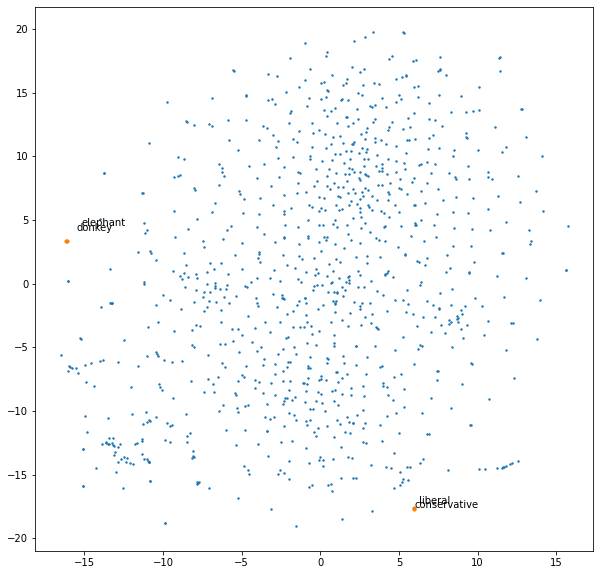

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,10))
display_tsne_neighborhood(glove, input_word = ['conservative', 'liberal', 'donkey', 'elephant'])

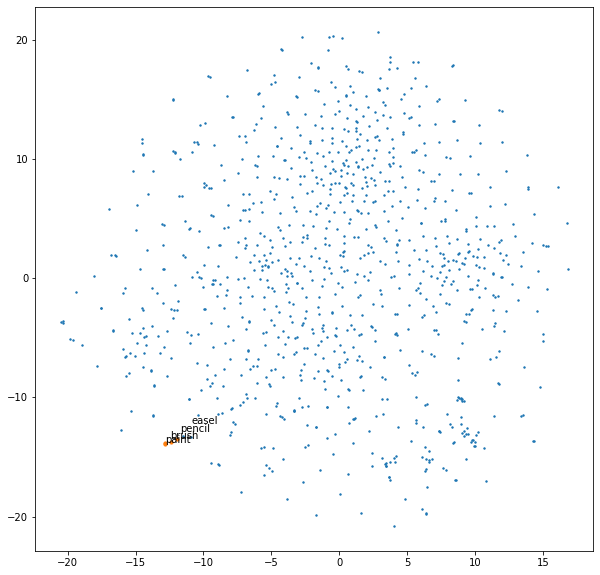

In [ ]:
#not surprising, tools used for art
%matplotlib inline
plt.figure(figsize=(10,10))
display_tsne_neighborhood(glove, input_word = ['paint', 'brush', 'pencil', 'easel'])

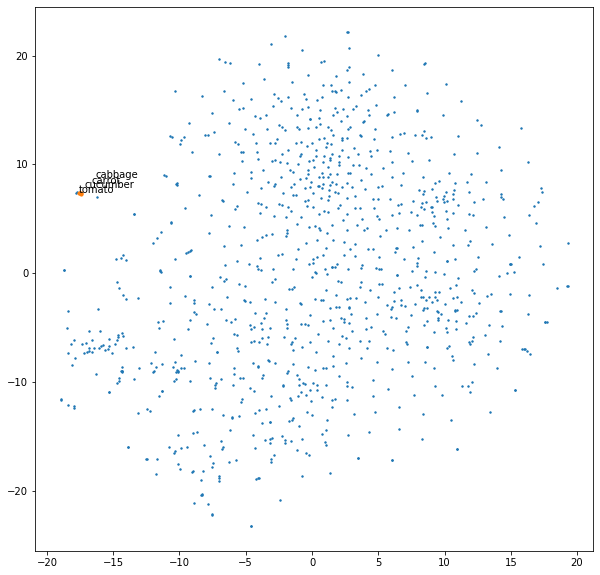

In [ ]:
#not surprising - vegetables
%matplotlib inline
plt.figure(figsize=(10,10))
display_tsne_neighborhood(glove, input_word = ['tomato', 'cucumber', 'carrot', 'cabbage'])

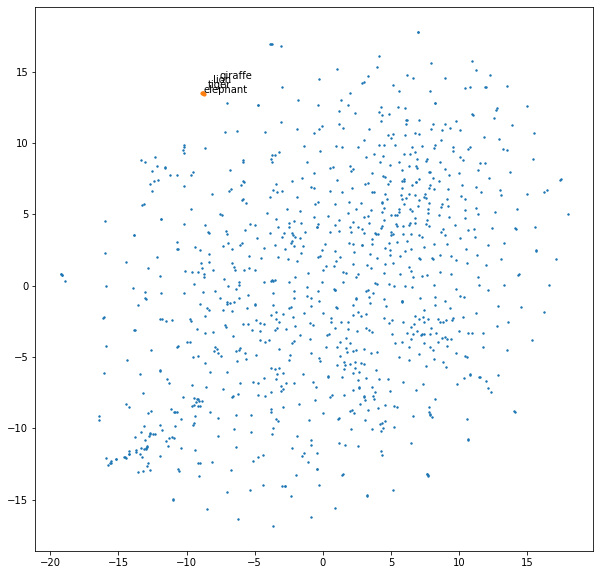

In [ ]:
#not surprising - zoo animals 
%matplotlib inline
plt.figure(figsize=(10,10))
display_tsne_neighborhood(glove, input_word = ['elephant', 'tiger', 'lion', 'giraffe'])

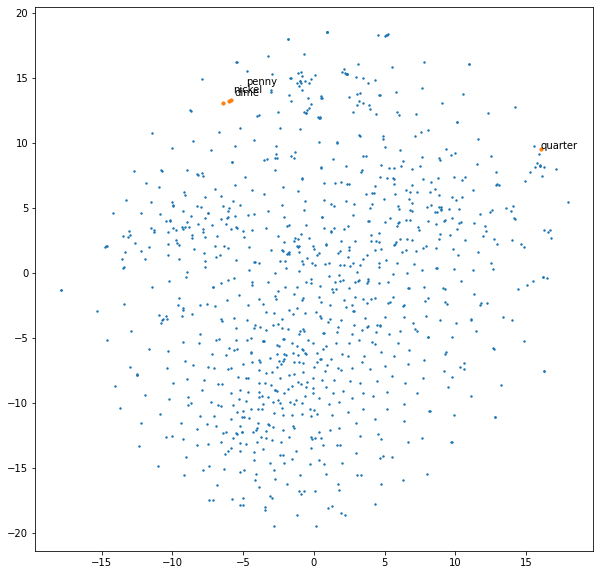

In [ ]:
#surprising -money
%matplotlib inline
plt.figure(figsize=(10,10))
display_tsne_neighborhood(glove, input_word = ['quarter', 'dime', 'nickel', 'penny'])

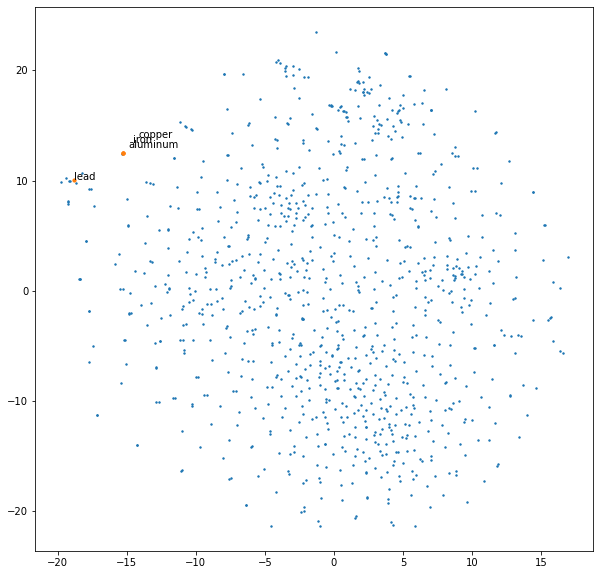

In [ ]:
#surprising - metals
%matplotlib inline
plt.figure(figsize=(10,10))
display_tsne_neighborhood(glove, input_word = ['lead', 'aluminum', 'iron', 'copper'])

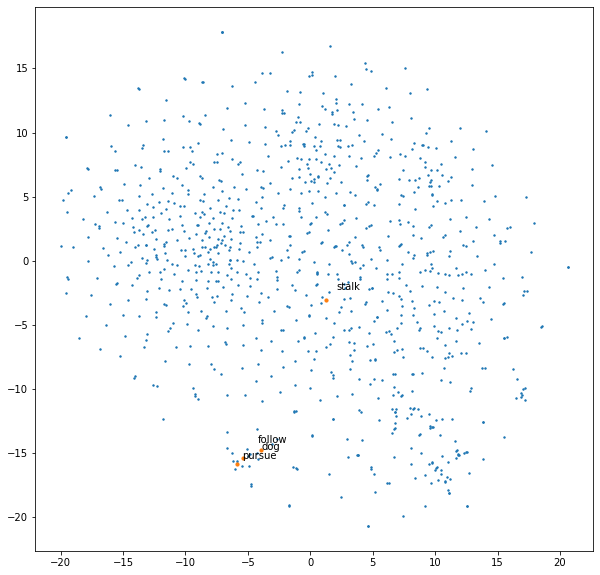

In [ ]:
#words that mean to pursue someone 
%matplotlib inline
plt.figure(figsize=(10,10))
display_tsne_neighborhood(glove, input_word = ['dog', 'pursue', 'stalk', 'follow'])

Words that were surprisingly far apart were often words that had multiple meanings, especially if its most common usage is not in the context it is provided it. For example, "stalk" here is used in its meaning of following someone, however it can also mean a plant stalk. It seems that one usage of the word outweighs the other (for example quarter as a coin vs as one fourth of something) and it ends up being far away from other words in its category. 

In [ ]:
import gensim
from gensim.models import word2vec
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
playlists = word2vec.LineSentence('https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn5/playlists.txt')
music_model = word2vec.Word2Vec(playlists, size=64, window=100, min_count=10)

2021-11-12 02:37:56,161 : INFO : collecting all words and their counts
2021-11-12 02:37:56,242 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-11-12 02:37:57,903 : INFO : PROGRESS: at sentence #10000, processed 107891 words, keeping 3250 word types
2021-11-12 02:37:59,125 : INFO : collected 3292 word types from a corpus of 189900 raw words and 18111 sentences
2021-11-12 02:37:59,130 : INFO : Loading a fresh vocabulary
2021-11-12 02:37:59,140 : INFO : effective_min_count=10 retains 2228 unique words (67% of original 3292, drops 1064)
2021-11-12 02:37:59,142 : INFO : effective_min_count=10 leaves 183255 word corpus (96% of original 189900, drops 6645)
2021-11-12 02:37:59,151 : INFO : deleting the raw counts dictionary of 3292 items
2021-11-12 02:37:59,153 : INFO : sample=0.001 downsamples 59 most-common words
2021-11-12 02:37:59,155 : INFO : downsampling leaves estimated 173511 word corpus (94.7% of prior 183255)
2021-11-12 02:37:59,165 : INFO : estimated 

In [ ]:
music_model.wv['299']

array([ 0.66102153, -0.16423035, -0.11084713, -0.95913064,  0.43883905,
        0.5689818 , -0.11616848,  0.77435446,  1.2197764 ,  0.6247174 ,
        0.4095537 ,  0.22362994,  0.49837   ,  1.5240339 , -0.07510579,
        0.27167186,  0.8788684 ,  0.41155815, -1.1427369 , -0.7907476 ,
        0.35698697, -0.08143476, -0.55712044, -0.367012  ,  0.35458732,
        0.19732104,  0.4244028 ,  0.21166314, -0.21883333, -0.5497546 ,
        0.5141057 ,  0.17787834, -0.61536545, -0.51803946, -0.77889633,
        0.961626  ,  0.3830617 , -0.15015593,  0.32048196, -0.14490396,
       -0.53711325,  0.9374046 , -0.07830881,  0.06530023,  0.3929379 ,
        0.31693417,  0.2198317 , -0.64129674, -0.21598959, -0.31510127,
        0.13079385, -0.07848136, -0.5318621 ,  0.02764084,  1.0641091 ,
        0.9819106 , -0.0456923 ,  0.2860905 ,  0.58324045, -0.30218685,
        0.02114099,  0.15893957, -0.5127126 ,  0.42769596], dtype=float32)

In [ ]:
from urllib.request import urlopen 

artist = []
file = urlopen('https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn5/artists.txt')
for line in file:
    art = line.decode("utf-8")
    artist.append(art.strip())

artist[0:10]

['Everette Harp',
 'Bishop Paul S. Morton & Aretha Franklin',
 'Frankie Ballard',
 'Herb Alpert',
 'Rod Stewart & Chaka Khan',
 'Scars On 45',
 'New Radicals',
 'Crosby, Stills & Nash',
 'Ledisi',
 'La Quinta Estacion']

In [ ]:
id2name = {}
name2id = {}
for w in range(len(artist)):
    id2name["%s" % w] = artist[w]
    name2id[artist[w]] = "%s" % w

id2name[name2id['Elton John']]

'Elton John'

#### 3.1 Similar artists

Find the 5 closest artist embedding vectors to the artists "The Beatles", "Lady Gaga", and "Nirvana". Comment on the results.

In [ ]:
# Don't change this function
def similar_artists(model, artist, n=5):
    id = name2id[artist]
    out = model.wv.most_similar(id, topn=n)

    print("artists similar to '%s'\n" % artist)
    for i in range(n) :
        name = id2name[out[i][0]]
        print("\t%s" % name)
        
similar_artists(music_model, 'Aerosmith')

2021-11-12 02:38:16,931 : INFO : precomputing L2-norms of word weight vectors


artists similar to 'Aerosmith'

	Billy Idol
	The Jimi Hendrix Experience
	The Black Crowes
	Def Leppard
	Boston


In [ ]:
print(similar_artists(music_model, "The Beatles"))
print(similar_artists(music_model, "Lady Gaga"))
print(similar_artists(music_model, "Nirvana"))

artists similar to 'The Beatles'

	Steppenwolf
	The Electric Light Orchestra
	Creedence Clearwater Revival
	Grand Funk Railroad
	The Kinks
None
artists similar to 'Lady Gaga'

	Bruno Mars
	Katy Perry
	Black Eyed Peas
	Ke$ha
	Jessie J
None
artists similar to 'Nirvana'

	Temple Of The Dog
	Stone Temple Pilots
	Audioslave
	Faith No More
	Pearl Jam
None


The results for each artist seem to be musicians who performed simliar genres of music in similar time periods. Artists similar to The Beatles are 60s and 70s rock, for Lady Gaga 2000s pop and for Nirvana 90s grunge. 

#### 3.3 Visualize embeddings

Use the t-SNE dimensionality reduction technique to visualize the artist embeddings. After running t-SNE on the artist embeddings, try visualizing  "The Temptations" and "The Supremes" together. Find a few more examples that you think are interesting and include the plots in your write-up. Comment on your findings.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# this functions computes and displays the 2-d t-SNE maps for a subset of the embedding vectors
# and displays them together with the points for a set of input words.

def display_tsne_artists(model, artists, nsample=1000, size1=2, size2=10, offset=5):
    
    arr = np.empty((0,64), dtype='f')

    # add the vector for each of the closest words to the array
    for a in range(len(artists)):
        id = name2id[artists[a]]
        arr = np.append(arr, np.array([model[id]]), axis=0)

    voc = [w for w in model.wv.vocab]
    ids = np.random.choice(range(len(voc)), size=nsample, replace=False)
    for w in ids:
        wrd_vector = model[voc[w]]
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coord = Y[:, 0]
    y_coord = Y[:, 1]
    # display scatter plot
    size=2
    plt.scatter(x_coord, y_coord, s=size1)
    plt.scatter(x_coord[0:len(artists)], y_coord[0:len(artists)],s=size2)
    
    # label the input words
    for w in range(len(artists)):
        plt.annotate(artists[w], xy=(x_coord[w],y_coord[w]), \
                     xytext=(w*offset,w*offset), textcoords='offset points')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


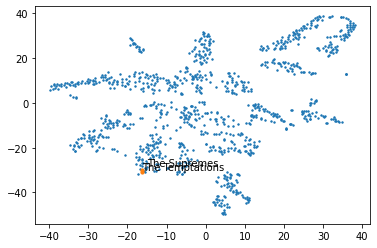

In [ ]:
display_tsne_artists(music_model, ["The Temptations", "The Supremes"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


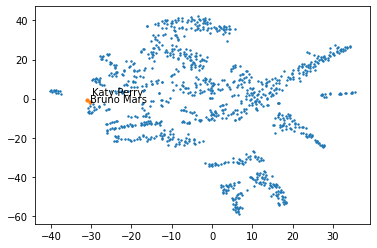

In [ ]:
display_tsne_artists(music_model, ["Bruno Mars", "Katy Perry"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


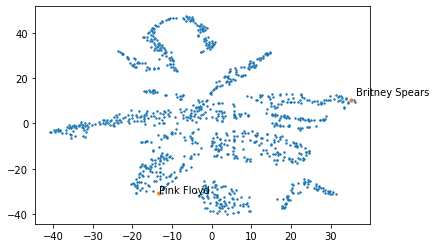

In [ ]:
display_tsne_artists(music_model, ["Pink Floyd", "Britney Spears"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


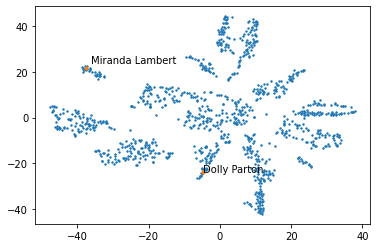

In [ ]:
display_tsne_artists(music_model, ["Dolly Parton", "Miranda Lambert"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


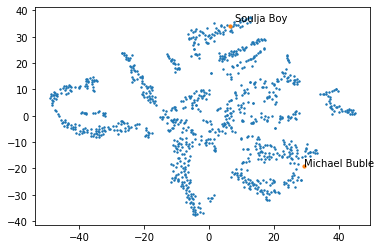

In [ ]:
display_tsne_artists(music_model, ["Michael Buble", "Soulja Boy"])

In the T-SNE visualizations it is not surprising that artists like Bruno Mars and Katy Perry are close together. They are artists that performed pop songs in the 2000s and 2010s. It is equally unsurprising that Pink Floyd and Britney Spears are far apart as they differ in time period and genre. The algorithm correctly identifies which singers perform similar styles of music in the same time period. The algorithm performed worse on singers that performed just at the same time period, but in different genres, like Soulja Boy and Michael Buble, or in the same genre but in different times, like Dolly Parton and Miranda Lampert. 